# Exploration spark: "What's the most cliche song ever written? How do we even measure cliche-ness?"

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [3]:
df = pd.read_csv('./data/Songs with metadata and lyrics.csv')

In [4]:
df.head()

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Week Position,Peak Position,Lyrics
0,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",https://p.scdn.co/mp3-preview/da2134a161f1cb34...,False,...Baby One More Time (Digital Deluxe Version),5/29/1999,31.0,1.0,"[Intro]\nOh baby, baby\nOh baby, baby\n\n[Vers..."
1,...Ready For It?Taylor Swift,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",NaN,False,"{'album_type': 'album', 'artists': [{'external...",12/2/2017,18.0,4.0,[Verse 1]\nKnew he was a killer first time tha...
2,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",NaN,True,The Blueprint 2 The Gift & The Curse,12/28/2002,4.0,4.0,"[Intro: Jay Z]\nUhh, uhh, uhh\nYou ready, B?\n..."
3,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",https://p.scdn.co/mp3-preview/a701445830ecacfb...,False,Radio Hits Of the '80s,6/12/1982,18.0,6.0,'65 love affair\nPaul Davis\n\nI was a car hop...
4,'TilThe Angels,The Angels,'Til,"['blues rock', 'garage rock', 'modern blues ro...",https://p.scdn.co/mp3-preview/bf264f14124ddf08...,False,Caprice! The Story Behind Gerry Granahan's Cap...,1/20/1962,38.0,14.0,"[Intro]\nYeah, yeah, yeah\nRap diablo\nYeah, y..."


In [5]:
df[df.Song == 'Our Song'].Lyrics.iloc[0]

'[Verse 1]\nI was riding shotgun with my hair undone\nIn the front seat of his car\nHe\'s got a one-hand feel on the steering wheel\nThe other on my heart\nI look around, turn the radio down\nHe says, "Baby, is something wrong?"\nI say, "Nothing, I was just thinking\nHow we don\'t have a song"\nAnd he says\n\n[Chorus]\nOur song is the slamming screen door\nSneakin\' out late, tapping on your window\nWhen we\'re on the phone and you talk real slow\n\'Cause it\'s late and your mama don\'t know\nOur song is the way you laugh\nThe first date: "Man, I didn\'t kiss her, and I should have"\nAnd when I got home \'fore I said amen\nAsking God if he could play it again\n\n[Verse 2]\nI was walking up the front porch steps\nAfter everything that day\nHad gone all wrong and been trampled on\nAnd lost and thrown away\nGot to the hallway, well on my way\nTo my lovin\' bed\nI almost didn\'t notice all the roses\nAnd the note that said\n\n[Chorus]\nOur song is the slamming screen door\nSneakin\' out la

# Simple definition: "cliche" is when write lines very similar to lines published in previous years.

## CLICHE->SONGS: choose a cliche (eg "I love you", "I've never felt this way before", "you're my everything"), then try to identify which songs contain it.

## SONGS->analyze->CLICHES: identify cliches from the songs

## Simplest: *word-for-word* identical

In [6]:
# using title as proxy for a single line here (lyrics too big to view)
df[df.Song.str.contains('i love you', case=False)] 

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Week Position,Peak Position,Lyrics
460,Baby I Love YouAretha Franklin,Aretha Franklin,Baby I Love You,"['classic soul', 'jazz blues', 'memphis soul',...",https://p.scdn.co/mp3-preview/39a582336820d9ae...,False,Aretha Arrives,9/16/1967,5.0,4.0,If you want my lovin'\nIf you really do\nDon't...
461,"Baby I Love Your Way (From ""Reality Bites"")Big...",Big Mountain,"Baby I Love Your Way (From ""Reality Bites"")",['reggae'],NaN,NaN,NaN,8/27/1994,34.0,6.0,PROLOGUE\n\nTwo tires fly. Two wail.\n\nA bamb...
479,"Baby, I Love YouAndy Kim",Andy Kim,"Baby, I Love You","['brill building pop', 'bubblegum pop']",NaN,False,Baby I Love You,9/6/1969,25.0,9.0,Have I ever told you\nHow good it feels to hol...
480,"Baby, I Love Your Way/Freebird MedleyWill To P...",Will To Power,"Baby, I Love Your Way/Freebird Medley",['freestyle'],NaN,NaN,NaN,2/18/1989,91.0,1.0,Shadows grow so long before my eyes\nAnd they'...
481,"Baby, I Love Your WayPeter Frampton",Peter Frampton,"Baby, I Love Your Way","['album rock', 'art rock', 'blues rock', 'brit...",NaN,False,Frampton Comes Alive! (Deluxe Edition),9/18/1976,30.0,12.0,[Verse 1]\nShadows grow so long before my eyes...
595,Because I Love You (The Postman Song)Stevie B,Stevie B,Because I Love You (The Postman Song),['freestyle'],https://p.scdn.co/mp3-preview/5894932928df6362...,False,Valentine's Day Love… A Special Kind,2/16/1991,49.0,1.0,I got your letter from the postman just the ot...
846,But You Know I Love YouThe First Edition,The First Edition,But You Know I Love You,[],https://p.scdn.co/mp3-preview/4aabe0d5899dbf62...,False,Country & Western Legend,3/8/1969,19.0,19.0,When the morning sun\nStreaks across my room\n...
2256,Hate That I Love YouRihanna Featuring Ne-Yo,Rihanna Featuring Ne-Yo,Hate That I Love You,"['barbadian pop', 'dance pop', 'pop', 'post-te...",NaN,False,Good Girl Gone Bad: Reloaded,1/12/2008,15.0,7.0,"[Intro: Rihanna & Ne-Yo]\nYeah, yeah\nYeah, ye..."
2279,He Don't Love You (Like I Love You)Tony Orland...,Tony Orlando & Dawn,He Don't Love You (Like I Love You),"['bubblegum pop', 'classic uk pop', 'country r...",https://p.scdn.co/mp3-preview/719f19b28e71a491...,False,He Don't Love You,6/14/1975,54.0,1.0,"He don't love you, like I love you\nIf he did,..."
2360,"Hello, I Love YouThe Doors",The Doors,"Hello, I Love You","['album rock', 'classic rock', 'piano rock', '...",https://p.scdn.co/mp3-preview/3d31a54a62e7489a...,False,Waiting for the Sun,8/3/1968,1.0,1.0,"[Chorus]\nHello, I love you\nWon't you tell me..."


## But how do you find similar lines that aren't *word-for-word* matches?

ie I want something like
> "Look at this cluster: "I love you", "you are my love", and "you are the love of my life" are close together. But "you are my spring dew" is far away."

### One approach: create a row for every *line*, then use word2vec & dimensio reduction to plot a 2D "phrase cloud"
- maybe limmit to first 10 lines of a song to quickly remove duplicates)
- maybe just start with most recent year

# DATA PREP: "explode" data into "one row per line"

In [7]:
df.describe()

,Week Position,Peak Position
count,7533.000000,7533.000000
mean,30.545068,8.576795
std,25.964184,5.938220
min,1.000000,1.000000
25%,11.000000,3.000000
50%,22.000000,8.000000
75%,43.000000,13.000000
max,100.000000,20.000000


# NOTE: I'm limiting data to 2019-2020

In [8]:
tiny_df = df[
    df.WeekID.str.endswith('2019') |
    df.WeekID.str.endswith('2020')
]
tiny_df

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Week Position,Peak Position,Lyrics
111,7 RingsAriana Grande,Ariana Grande,7 Rings,"['dance pop', 'pop', 'post-teen pop']",NaN,True,thank,3/2/2019,1.0,1.0,"[Verse 1]\nYeah, breakfast at Tiffany's and bo..."
136,A Holly Jolly ChristmasBurl Ives,Burl Ives,A Holly Jolly Christmas,"['adult standards', 'american folk revival']",NaN,False,Have A Holly Jolly Christmas,1/4/2020,4.0,4.0,"Have a holly, jolly Christmas;\nIt's the best ..."
137,A Holly Jolly ChristmasBurl Ives,Burl Ives,A Holly Jolly Christmas,"['adult standards', 'american folk revival']",NaN,False,Have A Holly Jolly Christmas,1/4/2020,4.0,4.0,"Have a holly, jolly Christmas;\nIt's the best ..."
149,A Lot21 Savage,21 Savage,A Lot,"['atl hip hop', 'pop rap', 'rap', 'trap']",https://p.scdn.co/mp3-preview/0ff1fadf009e81e7...,True,i am > i was,3/30/2019,21.0,12.0,[Intro: 21 Savage]\nI love you\nTurn my headph...
271,All I Want For Christmas Is YouMariah Carey,Mariah Carey,All I Want For Christmas Is You,"['dance pop', 'pop', 'r&b', 'urban contemporary']",https://p.scdn.co/mp3-preview/ab4f06069148ef85...,False,Merry Christmas,12/21/2019,1.0,1.0,[Intro]\nI don't want a lot for Christmas\nThe...
...,...,...,...,...,...,...,...,...,...,...,...
7528,"Whats PoppinJack Harlow Featuring DaBaby, Tory...","Jack Harlow Featuring DaBaby, Tory Lanez & Lil...",Whats Poppin,NaN,NaN,NaN,NaN,8/15/2020,3.0,2.0,[Verse 1: Jack Harlow]\nTornato con il remix\n...
7529,Wishing WellJuice WRLD,Juice WRLD,Wishing Well,"['chicago rap', 'melodic rap']",NaN,True,"{'album_type': 'album', 'artists': [{'external...",8/22/2020,27.0,5.0,"[Intro]\nMm-mm, mm-mm-mm-mm, mm-mm-mm, uh\nI c..."
7530,WoahLil Baby,Lil Baby,Woah,"['atl hip hop', 'atl trap', 'pop rap', 'rap', ...",NaN,True,Woah,3/21/2020,31.0,15.0,[Intro]\nNew car very noisy\nCome through and ...
7531,WonderShawn Mendes,Shawn Mendes,Wonder,"['canadian pop', 'dance pop', 'pop', 'post-tee...",NaN,False,"{'album_type': 'single', 'artists': [{'externa...",12/19/2020,70.0,18.0,[Verse 1]\nI wonder if I'm being real\nDo I sp...


In [9]:
# tiny_df['Parsed Lyrics'] = tiny_df.Lyrics.apply(lambda l: l.split('\n')[:5])
tiny_df['Parsed Lyrics'] = tiny_df.Lyrics.apply(lambda l: l.split('\n'))

/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
tiny_df_parsed = tiny_df.explode('Parsed Lyrics').drop_duplicates(
    subset=['Parsed Lyrics', 'SongID']
).drop(
    columns=['Lyrics']
).rename(columns={'Parsed Lyrics': 'lyric_line'})


### Filter & clean

In [11]:
FILTERED_LINES = ['[Intro]', '[Verse 1]', '[Verse 2]'] # TODO: do more robust filtering of noise etc
just_lyrics_and_artist = (
    tiny_df_parsed[
        ['Performer', 'lyric_line']
    ]
    .replace('', np.nan)
    .dropna()
    .reset_index(drop=True)
)
just_lyrics_and_artist = just_lyrics_and_artist[~just_lyrics_and_artist['lyric_line'].isin(FILTERED_LINES)].reset_index(drop=True)
just_lyrics_and_artist['lyric_line'] = just_lyrics_and_artist['lyric_line'].apply(lambda val: val and val.replace('â\x80\x99', "''"))
just_lyrics_and_artist

,Performer,lyric_line
0,Ariana Grande,"Yeah, breakfast at Tiffany's and bottles of bu..."
1,Ariana Grande,Girls with tattoos who like getting in trouble
2,Ariana Grande,"Lashes and diamonds, ATM machines"
3,Ariana Grande,Buy myself all of my favorite things (Yeah)
4,Ariana Grande,"Been through some bad shit, I should be a sad ..."
...,...,...
12263,Justin Bieber,I'm elated that you are my lady
12264,Justin Bieber,"You got the yum, yum, yum, yum"
12265,Justin Bieber,"You got the yum, yum-yum, woah"
12266,Justin Bieber,Woah-ooh


In [12]:
just_lyrics_and_artist['lyric_line'].tolist()

["Yeah, breakfast at Tiffany's and bottles of bubbles",
 'Girls with tattoos who like getting in trouble',
 'Lashes and diamonds, ATM machines',
 'Buy myself all of my favorite things (Yeah)',
 'Been through some bad shit, I should be a sad bitch',
 "Who woulda thought it'd turn me to a savage?",
 'Rather be tied up with calls and not strings',
 'Write my own checks like I write what I sing, yeah (Yeah)',
 '[Pre-Chorus]',
 "My wrist, stop watchin', my neck is flossy",
 "Make big deposits, my gloss is poppin'",
 'You like my hair? Gee, thanks, just bought it',
 'I see it, I like it, I want it, I got it (Yeah)',
 '[Chorus]',
 'I want it, I got it, I want it, I got it',
 'I see it, I like it, I want it, I got it (Yep)',
 'Wearing a ring, but ain\'t gon\' be no "Mrs."',
 'Bought matching diamonds for six of my bitches',
 "I'd rather spoil all my friends with my riches",
 'Think retail therapy my new addiction',
 "Whoever said money can't solve your problems",
 "Must not have had enough mon

# EMBED WORDS USING Universal Encoder

In [13]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [14]:
np.__version__

'1.19.5'

In [20]:
model = hub.load('./data/universal-sentence-encoder-large_5/')

In [21]:
def embed(input):
    return model(input)

#### Demo for reference:

In [22]:
#@title Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [-0.03458563983440399, -0.017990149557590485, 0.00198056036606431, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.05833394452929497, -0.0818500891327858, 0.06890939176082611, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.026461753994226456, -0.019115690141916275, -0.04207038879394531, ...]



In [23]:
message_embeddings = embed(just_lyrics_and_artist['lyric_line'])

# Dimension reduction

## Dimension reduction with TSNE

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne_transformed_embeddings = TSNE(
    n_components=2,
    learning_rate='auto',
    init='pca'
).fit_transform(message_embeddings)

/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [28]:
def concat_x_and_y(x_and_y):
    return pd.concat(
    [just_lyrics_and_artist, pd.DataFrame(x_and_y, columns=['x', 'y'])],
    axis=1
)

In [29]:
tsne_lyrics_and_artist = concat_x_and_y(tsne_transformed_embeddings)

<AxesSubplot:xlabel='x', ylabel='y'>

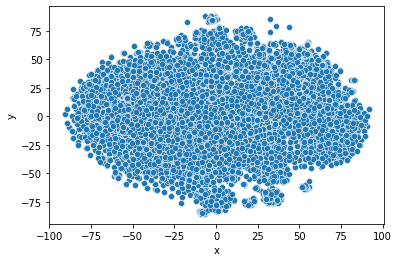

In [30]:
sns.scatterplot(data=tsne_lyrics_and_artist, x='x', y='y')

# Dimension reduction with UMAP

In [31]:
import umap
from sklearn.preprocessing import StandardScaler

In [32]:
reducer = umap.UMAP()

In [33]:
embedding = reducer.fit_transform(
    StandardScaler().fit_transform(message_embeddings)
)

In [34]:
umap_lyrics_and_artist = concat_x_and_y(embedding)
umap_lyrics_and_artist

,Performer,lyric_line,x,y
0,Ariana Grande,"Yeah, breakfast at Tiffany's and bottles of bu...",5.772765,10.079761
1,Ariana Grande,Girls with tattoos who like getting in trouble,7.002055,12.118416
2,Ariana Grande,"Lashes and diamonds, ATM machines",5.714211,9.981569
3,Ariana Grande,Buy myself all of my favorite things (Yeah),6.922874,11.207605
4,Ariana Grande,"Been through some bad shit, I should be a sad ...",9.461829,13.982278
...,...,...,...,...
12263,Justin Bieber,I'm elated that you are my lady,8.657548,14.967014
12264,Justin Bieber,"You got the yum, yum, yum, yum",6.729415,14.189542
12265,Justin Bieber,"You got the yum, yum-yum, woah",6.716717,14.234124
12266,Justin Bieber,Woah-ooh,6.907512,8.273879


<AxesSubplot:xlabel='x', ylabel='y'>

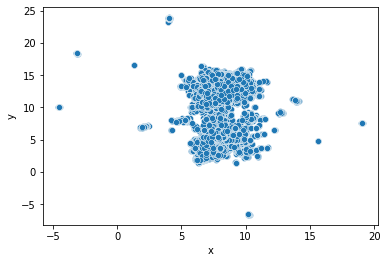

In [35]:
sns.scatterplot(data=umap_lyrics_and_artist, x='x', y='y')

## Export to CSV

In [36]:
def normalize_zero_to_one(s):
    return (s - s.min()) / (s.max() - s.min())

def export_data(data):
    temp = data.copy().dropna()
    temp['x'] = normalize_zero_to_one(temp.x)
    temp['y'] = normalize_zero_to_one(temp.y)
    temp['x'] = temp['x'].round(3)
    temp['y'] = temp['y'].round(3)
    export = temp[['lyric_line', 'x', 'y']]
    export.to_csv('./data/viz ready export.csv', index=False)
    return export

In [37]:
export_data(umap_lyrics_and_artist)


,lyric_line,x,y
0,"Yeah, breakfast at Tiffany's and bottles of bu...",0.438,0.546
1,Girls with tattoos who like getting in trouble,0.490,0.613
2,"Lashes and diamonds, ATM machines",0.435,0.543
3,Buy myself all of my favorite things (Yeah),0.486,0.583
4,"Been through some bad shit, I should be a sad ...",0.593,0.674
...,...,...,...
12263,I'm elated that you are my lady,0.559,0.706
12264,"You got the yum, yum, yum, yum",0.478,0.680
12265,"You got the yum, yum-yum, woah",0.477,0.682
12266,Woah-ooh,0.486,0.488
